<p style="background-color:#ff9999;font-family:newtimeroman;font-size:130%;color:black;text-align:center;border-radius:15px 50px; padding:12px;border: 2px solid black;">Liver Cirrhosis Prediction</p>

# Summary : 
Liver cirrhosis is a widespread problem especially in North America due to high intake of alcohol. In this project, we will predict liver cirrhosis in a patient based on certain lifestyle and health conditions of a patient.

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. 

<p style="background-color:#ff9999;font-family:newtimeroman;font-size:130%;color:black;text-align:center;border-radius:15px 50px; padding:12px;border: 2px solid black;"> Import Necessary Libraries</p>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

<p style="background-color:#ff9999;font-family:newtimeroman;font-size:130%;color:black;text-align:center;border-radius:15px 50px; padding:12px;border: 2px solid black;">Read Dataset</p>

In [23]:
df = pd.read_csv('../input/cirrhosis-prediction-dataset/cirrhosis.csv', index_col='ID')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


<p style="background-color:#ff9999;font-family:newtimeroman;font-size:130%;color:black;text-align:center;border-radius:15px 50px; padding:12px;border: 2px solid black;"> Data Understanding and Data Preparation</p>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [25]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [26]:
df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

**We're dealing with two distinct data types:**

**1. Numerical Data:** Examples include Age, Cholesterol, and Platelets, among others.

**2. Categorical Data:** This category encompasses variables like Drug, Sex, and Spiders.

**For numerical data: We'll employ the median for imputation. This choice is preferred over the mean to mitigate the impact of outliers.**

**For categorical data:** Imputation will involve replacing missing values with the most frequently occurring class.







In [27]:
# For Numerical Type
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

## Missing Values Handling
This is a problem, we could just get rid of all examples with NA values, but in this case our case of small dataset we cannot afford that. 

**We will impute the missing entries with some statistical calculations.**

In [28]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [29]:
# For Categorical type
df.select_dtypes(include=('object')).isna().sum()

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [30]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

**Now we have remove all the null values it looks pretty clean now.**

<p style="background-color:#ff9999;font-family:newtimeroman;font-size:130%;color:black;text-align:center;border-radius:15px 50px; padding:12px;border: 2px solid black;">Exploratory Data Analysis</p>


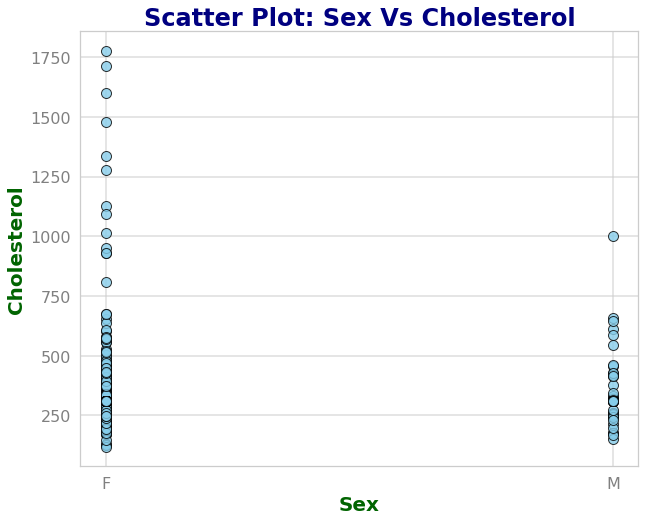

In [31]:
# Bar plots for categorical attributes
categorical_attributes = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug']
numerical_attributes = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                        'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot(data, x_col, y_col, title):
    """
    Plot a scatter plot with a different style and design.

    Parameters:
    - data (DataFrame): Input data
    - x_col (str): Column name for x-axis
    - y_col (str): Column name for y-axis
    - title (str): Title of the plot
    """
    # Set style
    sns.set(style='whitegrid', font_scale=1.5)

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(data[x_col], data[y_col], color='skyblue', edgecolors='black', alpha=0.8, s=100)

    # Set title and labels
    plt.title(title, fontsize=24, fontweight='bold', color='navy')
    plt.xlabel(x_col, fontsize=20, fontweight='bold', color='darkgreen')
    plt.ylabel(y_col, fontsize=20, fontweight='bold', color='darkgreen')

    # Increase tick label font size and color
    plt.xticks(fontsize=16, color='gray')
    plt.yticks(fontsize=16, color='gray')

    # Add grid with solid lines
    plt.grid(True, linestyle='-', linewidth=2, alpha=0.5)

    plt.show()

# Example usage
scatter_plot(df, 'Sex', 'Cholesterol', 'Scatter Plot: Sex Vs Cholesterol')



**We can see the separation of cholesterol level in male and female and we can also obersve that females have high values of cholesterol level**

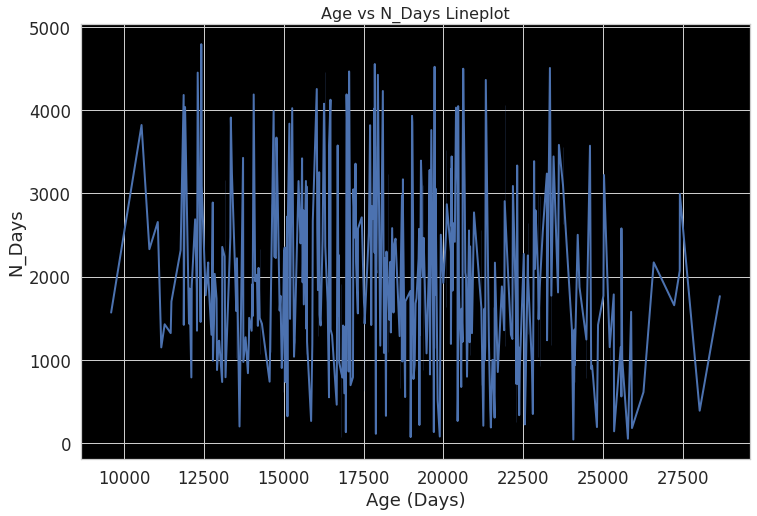

In [32]:

def plot_line(df, x_col, y_col, title):
    """
    Plot a line plot with specified x and y columns.

    Parameters:
    - df (DataFrame): Input DataFrame.
    - x_col (str): Column name for x-axis.
    - y_col (str): Column name for y-axis.
    - title (str): Title of the plot.
    """
    plt.figure(figsize=(12, 8))
    sns.lineplot(x=df[x_col], y=df[y_col], data=df, linewidth=2)

    plt.title(title, fontsize=16)
    plt.xlabel(f'{x_col} (Days)')
    plt.ylabel(y_col)

    plt.gca().set_facecolor('black')

    # Show the plot
    plt.show()

# Example usage:
plot_line(df, 'Age', 'N_Days', 'Age vs N_Days Lineplot')

**As 'N_Days' represent number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986 so its relation with Age in days we can observe that people died from Liver Cirrhosis is very low late stages but some high relation in mid ages.**

In [33]:
# Converting Target categories into integers 1 for Cirrhosis, 0 otherwise
df['Stage'] = np.where(df['Stage'] == 4,1,0)

**We are finding relation with the different diseases** 

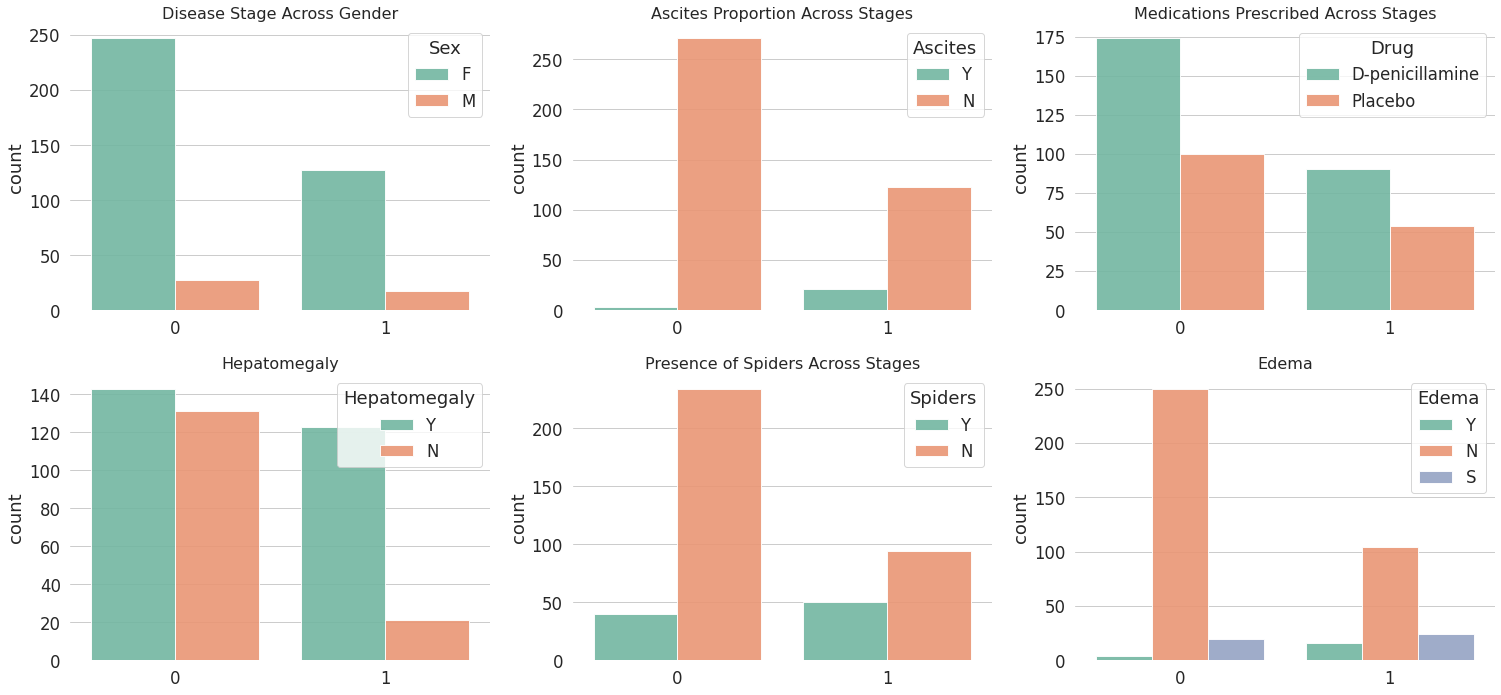

In [34]:
def plot_stage_relationships(df):
    """
    Plot relationships between disease stage and various categorical variables.

    Parameters:
    - df (DataFrame): Input DataFrame containing data.
    """
    # Set plot size
    plt.figure(figsize=(21.2, 10))

    # Define palette colors
    palette = 'Set2'

    # Plot Disease Stage Across Gender
    plt.subplot(2, 3, 1)
    sns.countplot(x=df['Stage'], hue=df['Sex'], palette=palette, alpha=0.9)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
    plt.xlabel('')
    plt.title('Disease Stage Across Gender', fontsize=16)

    # Plot Ascites proportion across Stages
    plt.subplot(2, 3, 2)
    sns.countplot(x=df['Stage'], hue=df['Ascites'], palette=palette, alpha=0.9)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
    plt.xlabel('')
    plt.title('Ascites Proportion Across Stages', fontsize=16)

    # Plot Medications prescribed across Stages
    plt.subplot(2, 3, 3)
    sns.countplot(x=df['Stage'], hue=df['Drug'], palette=palette, alpha=0.9)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
    plt.xlabel('')
    plt.title('Medications Prescribed Across Stages', fontsize=16)

    # Plot Hepatomegaly
    plt.subplot(2, 3, 4)
    sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette=palette, alpha=0.9)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
    plt.xlabel('')
    plt.title('Hepatomegaly', fontsize=16)

    # Plot Presence of Spiders across stages
    plt.subplot(2, 3, 5)
    sns.countplot(x=df['Stage'], hue=df['Spiders'], palette=palette, alpha=0.9)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
    plt.xlabel('')
    plt.title('Presence of Spiders Across Stages', fontsize=16)

    # Plot Edema
    plt.subplot(2, 3, 6)
    sns.countplot(x=df['Stage'], hue=df['Edema'], palette=palette, alpha=0.9)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
    plt.xlabel('')
    plt.title('Edema', fontsize=16)

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

# Example usage:
plot_stage_relationships(df)


**There are some interesting insights:**

- if we observe closely. Take the case at Ascites, we observe that the rist of disease is higher with increase in Ascites. also presence of spiders has a positive relation with disease risk.

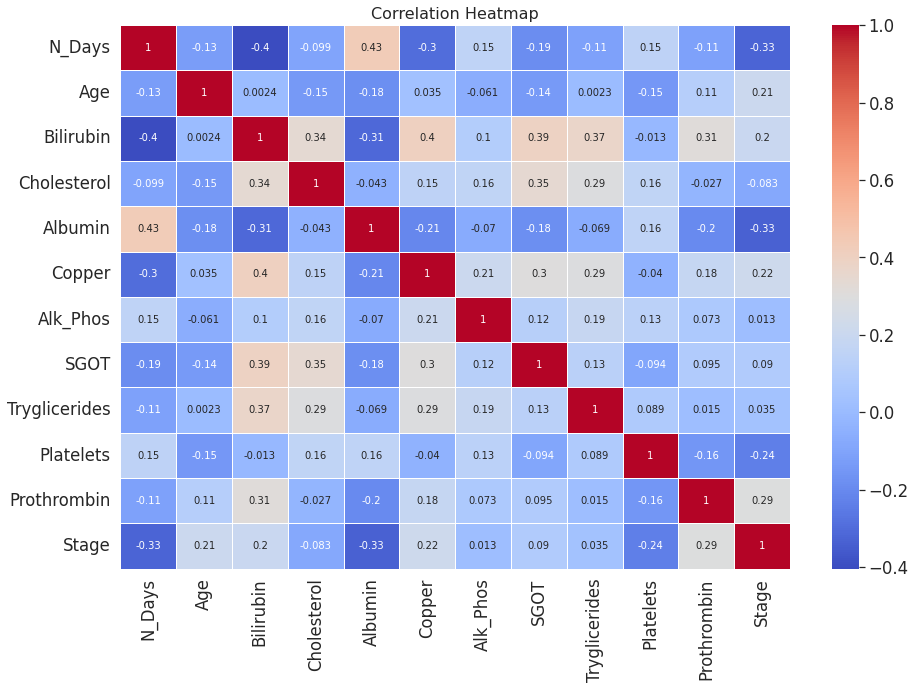

In [35]:
def plot_correlation_heatmap(data):
    """
    Plot a correlation heatmap.

    Parameters:
    - data (DataFrame): Input data
    """
    plt.figure(figsize=(15, 10))
    sns.heatmap(data.corr(), annot=True, annot_kws={'size': 10}, linewidths=0.5, cmap='coolwarm')
    plt.title("Correlation Heatmap", fontsize=16)
    plt.show()

plot_correlation_heatmap(df)


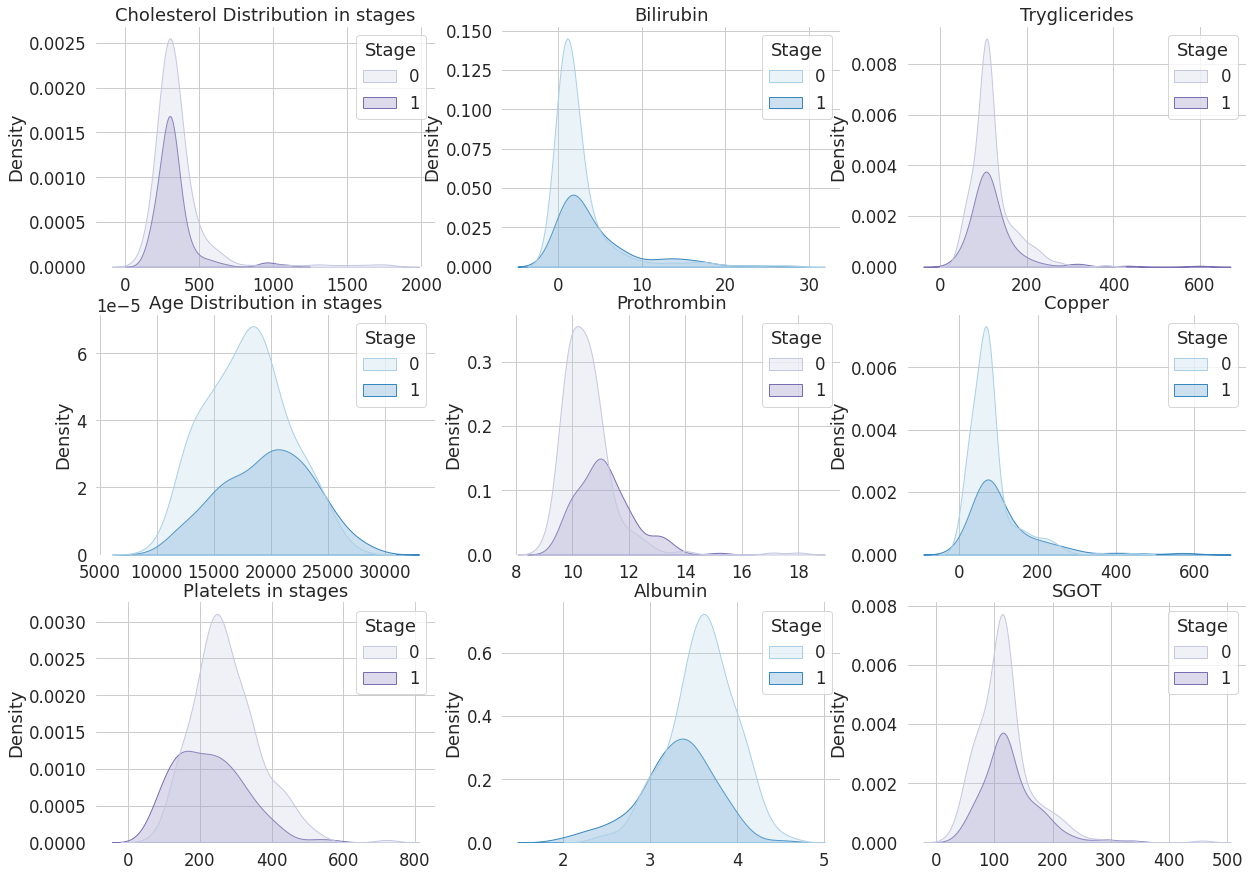

In [37]:
#@title Distribution Polts
plt.figure(figsize=(20.6,15))

plt.subplot(3,3,1)
sns.kdeplot(df['Cholesterol'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Cholesterol Distribution in stages');

plt.subplot(3,3,2)
sns.kdeplot(df['Bilirubin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Bilirubin');

plt.subplot(3,3,3)
sns.kdeplot(df['Tryglicerides'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Tryglicerides');

plt.subplot(3,3,4)
sns.kdeplot(df['Age'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Age Distribution in stages');

plt.subplot(3,3,5)
sns.kdeplot(df['Prothrombin'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Prothrombin');

plt.subplot(3,3,6)
sns.kdeplot(df['Copper'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Copper');

plt.subplot(3,3,7)
sns.kdeplot(df['Platelets'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Platelets in stages');

plt.subplot(3,3,8)
sns.kdeplot(df['Albumin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Albumin');

plt.subplot(3,3,9)
sns.kdeplot(df['SGOT'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('SGOT');

**We can focus on distribution of plots using different plotting styles the feature distribution we can observe that in features such as Age, Prothrombin, Copper the risk of the disease increase with increase in feature value, thus having a positive co-relation on with the disease probability. We will fit regression line to check.**

<p style="background-color:#ff9999;font-family:newtimeroman;font-size:130%;color:black;text-align:center;border-radius:15px 50px; padding:12px;border: 2px solid black;">Data Preprocessing</p>


In [38]:
# replacing catagorical data with intigers.
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1

In [39]:
#We will not be using 'Status' and 'N_days' as our features since this will cause data Leakage.
# Setting up Features and Target
X = df.drop(['Status', 'N_Days', 'Stage'], axis=1)
y = df.pop('Stage')

**Upon investigating the distribution of the target variable within the dataset, it became apparent that the data is characterized by an imbalance, wherein certain classes are overrepresented compared to others.**

- To address this imbalance effectively, we will implement Stratified k-Fold Cross Validation.








# Statistical Analysis

In [40]:
from tabulate import tabulate

def calculate_statistical_moments(data_copy):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    # Select only the top 12 features
    data_copy = data_copy.iloc[:, :13]
    
    moments = {
        'Mean': data_copy.mean(),
        'Median': data_copy.median(),
        'Standard Deviation': data_copy.std(),
        'Skewness': data_copy.skew(),
        'Kurtosis': data_copy.kurtosis()
    }
    moments_df = pd.DataFrame(moments)
    return moments_df

def display_statistical_moments(data_copy):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.
    """
    moments_df = calculate_statistical_moments(data_copy)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

display_statistical_moments(df)



Statistical Moments:

+--------------+------------+----------+----------------------+------------+------------+
|              |    Mean    |  Median  |  Standard Deviation  |  Skewness  |  Kurtosis  |
+==============+============+==========+======================+============+============+
|    N_Days    |  1917.78   |   1730   |       1104.67        |  0.472602  | -0.482139  |
+--------------+------------+----------+----------------------+------------+------------+
|    Status    | -0.325359  |    0     |       0.583036       |  0.203728  | -0.640716  |
+--------------+------------+----------+----------------------+------------+------------+
|     Drug     |  0.368421  |    0     |       0.482954       |  0.547511  |  -1.70843  |
+--------------+------------+----------+----------------------+------------+------------+
|     Age      |  18533.4   |  18628   |       3815.85        | 0.0868502  |  -0.61673  |
+--------------+------------+----------+----------------------+------------+-

# Model Building

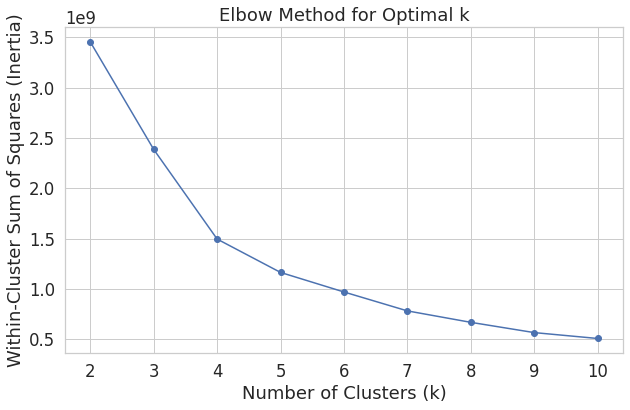

In [41]:
def plot_elbow_curve(X, min_clusters=2, max_clusters=10):
    """
    Plot the elbow curve to determine the optimal number of clusters using the KMeans algorithm.

    Parameters:
    - X (DataFrame): Input features.
    - min_clusters (int): Minimum number of clusters to test.
    - max_clusters (int): Maximum number of clusters to test.

    Returns:
    - None
    """
    # Initialize lists to store inertia values
    inertia_values = []

    # Test different values of k (number of clusters)
    k_values = range(min_clusters, max_clusters + 1)

    for k in k_values:
        # Create KMeans clustering model
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)

        # Append the inertia value to the list
        inertia_values.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

# Example usage:
plot_elbow_curve(X)


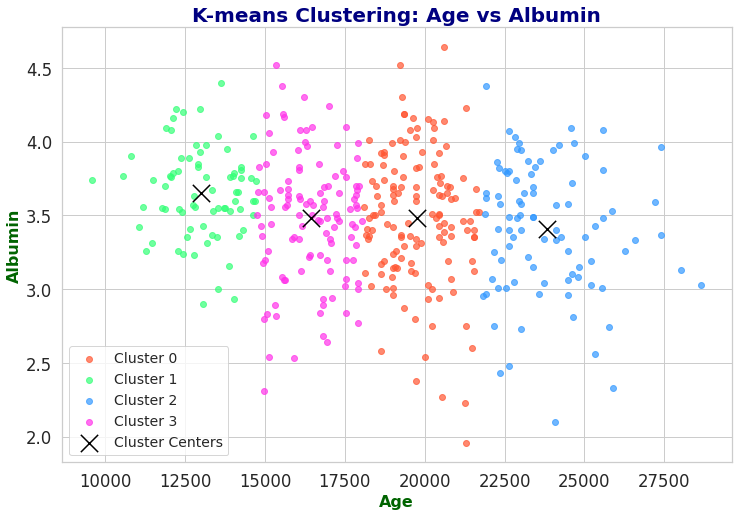

In [42]:
def plot_kmeans_clusters(X, x_col, y_col, num_clusters=4):
    """
    Plot clusters using K-means clustering.

    Parameters:
    - X (DataFrame): Input DataFrame containing features.
    - x_col (str): Column name for x-axis.
    - y_col (str): Column name for y-axis.
    - num_clusters (int): Number of clusters for K-means.

    Returns:
    - None
    """
    # Initialize KMeans model
    km = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit K-means and assign cluster labels
    X['cluster'] = km.fit_predict(X[[x_col, y_col]])
    
    # Plot clusters with cluster centers
    plt.figure(figsize=(12, 8))
    
    # Define colors for each cluster
    colors = ['#FF5733', '#33FF77', '#3399FF', '#FF33EA']
    
    # Plot each cluster using a different color
    for cluster_label, color in zip(sorted(X['cluster'].unique()), colors):
        cluster_data = X[X['cluster'] == cluster_label]
        plt.scatter(cluster_data[x_col], cluster_data[y_col], label=f'Cluster {cluster_label}', alpha=0.7, color=color)
    
    # Plot cluster centers
    cluster_centers = km.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='black', label='Cluster Centers')
    
    # Set plot title and labels
    plt.title(f'K-means Clustering: {x_col} vs {y_col}', fontsize=20, fontweight='bold', color='navy')
    plt.xlabel(x_col, fontsize=16, fontweight='bold', color='darkgreen')
    plt.ylabel(y_col, fontsize=16, fontweight='bold', color='darkgreen')
    
    # Add legend
    plt.legend(fontsize=14)
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Example usage:
plot_kmeans_clusters(X, 'Age', 'Albumin', num_clusters=4)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np

def train_logistic_regression(X, y, max_iter=5000, solver='saga', n_splits=10, random_state=1):
    """
    Train a logistic regression model with hyperparameters using stratified k-fold cross-validation.

    Parameters:
    - X (DataFrame): Input features.
    - y (Series): Target variable.
    - max_iter (int): Maximum number of iterations for logistic regression.
    - solver (str): Algorithm to use in the optimization problem.
    - n_splits (int): Number of splits for stratified k-fold.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - y_pred (array): Predictions of the trained model.
    - y_test (array): True labels of the test set.
    """
    # Initialize logistic regression model
    log_model = LogisticRegression(max_iter=max_iter, solver=solver)
    
    # Initialize stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    
    # Initialize list to store predictions
    y_pred = []
    
    # Initialize list to store true labels of the test set
    y_test = []
    
    # Initialize list to store accuracies
    acc = []
    
    # Function for training and testing the model
    def training(train, test, fold_no):
        X_train = X.iloc[train]
        y_train = y.iloc[train]
        X_test = X.iloc[test]
        y_test_fold = y.iloc[test]
        log_model.fit(X_train, y_train)
        y_pred_fold = log_model.predict(X_test)
        score = log_model.score(X_test, y_test_fold)
        acc.append(score)
        print(f'For Fold {fold_no}, the accuracy is {score}')
        return y_pred_fold, y_test_fold
    
    # Perform stratified k-fold cross-validation
    fold_no = 1
    for train_index, test_index in skf.split(X, y):
        y_pred_fold, y_test_fold = training(train_index, test_index, fold_no)
        y_pred.extend(y_pred_fold)
        y_test.extend(y_test_fold)
        fold_no += 1
    
    # Calculate mean accuracy
    mean_accuracy = np.mean(acc)
    print('\nMean Accuracy:', mean_accuracy)
    
    return np.array(y_pred), np.array(y_test)

# Example usage:
y_pred, y_test = train_logistic_regression(X, y)


For Fold 1, the accuracy is 0.6904761904761905
For Fold 2, the accuracy is 0.7857142857142857
For Fold 3, the accuracy is 0.6190476190476191
For Fold 4, the accuracy is 0.6666666666666666
For Fold 5, the accuracy is 0.8095238095238095
For Fold 6, the accuracy is 0.6666666666666666
For Fold 7, the accuracy is 0.6904761904761905
For Fold 8, the accuracy is 0.7380952380952381
For Fold 9, the accuracy is 0.7317073170731707
For Fold 10, the accuracy is 0.6341463414634146

Mean Accuracy: 0.7032520325203252


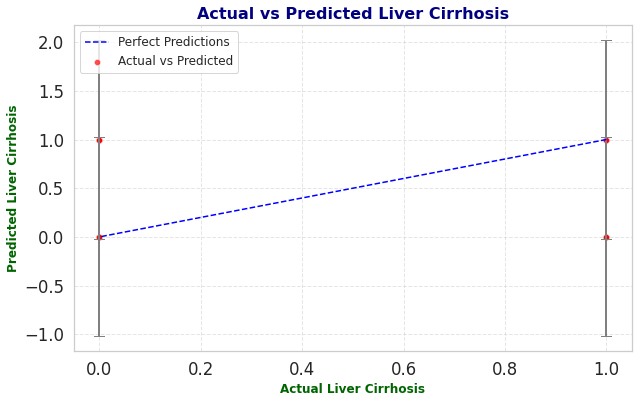

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_actual_vs_predicted(y_test, y_pred):
    """
    Plot actual vs predicted values with confidence intervals and error bars.

    Parameters:
    - y_test (array-like): Array of actual target values.
    - y_pred (array-like): Array of predicted target values.

    Returns:
    - None
    """
    # Calculate the residuals (difference between actual and predicted values)
    residuals = y_test - y_pred

    # Calculate the standard deviation of the residuals
    std_residuals = np.std(residuals)

    # Calculate the 95% confidence interval for the predicted values
    confidence_interval = 1.96 * std_residuals  # Assuming normal distribution

    # Set up the figure and axes
    plt.figure(figsize=(10, 6))

    # Scatter plot of actual vs predicted values
    sns.scatterplot(x=y_test, y=y_pred, color='red', alpha=0.7, label='Actual vs Predicted')
    
    # Plot the diagonal line for perfect predictions
    plt.plot(y_pred, y_pred, color='blue', linestyle='--', label='Perfect Predictions')
    
    # Plot confidence intervals as error bars
    plt.errorbar(y_test, y_pred, yerr=confidence_interval, fmt='none', ecolor='gray', capsize=5, alpha=0.5)

    # Set title and labels
    plt.title('Actual vs Predicted Liver Cirrhosis', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Actual Liver Cirrhosis', fontsize=12, fontweight='bold', color='darkgreen')
    plt.ylabel('Predicted Liver Cirrhosis', fontsize=12, fontweight='bold', color='darkgreen')
    
    # Add legend and grid
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.show()

# Example usage:
plot_actual_vs_predicted(y_test, y_pred)
